# Code to make figures for CTN lab meeting. 
- Video of the median pose
- Video of consensus being generated via heatmaps 
- Dissection of RMSE? 

## Get the ensembles: 

In [10]:
video_name = "ibl1_labeled.mp4"

In [33]:
import dgp_ensembletools.models
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import joblib 
import os
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
#dgp_ensembletools.models.memory = joblib.Memory(os.path.join(os.getenv("HOME"),"ensembledata_2","cache"))

In [2]:
ensemble = dgp_ensembletools.models.Ensemble("../data/data",[str(i+1) for i in range(4)],"mp4")

In [3]:
print(ensemble.get_median_pose.__doc__)
median_pose = ensemble.get_mean_pose(video_name,range(0,1001))
medpose_full = np.stack(median_pose,axis = 1)

Gets the scoremaps across the ensemble for this frame range of this video at this snapshot, and calculates the median pose from it.  
        NOTE: passing frame_range(0,2) will give 1 frame, not 2 as you would expect. 
        :param video_name:
        :param frame_range:
        :param snapshot:
        :param shuffle:

        
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
snapshot-step2-final--0


loading dlc project config...
scaling refs.


In [19]:
all_pose = ensemble.get_poses(video_name)

In [11]:
clip = ensemble.get_video_clip(video_name,range(0,1001))


<IPython.core.display.Javascript object>


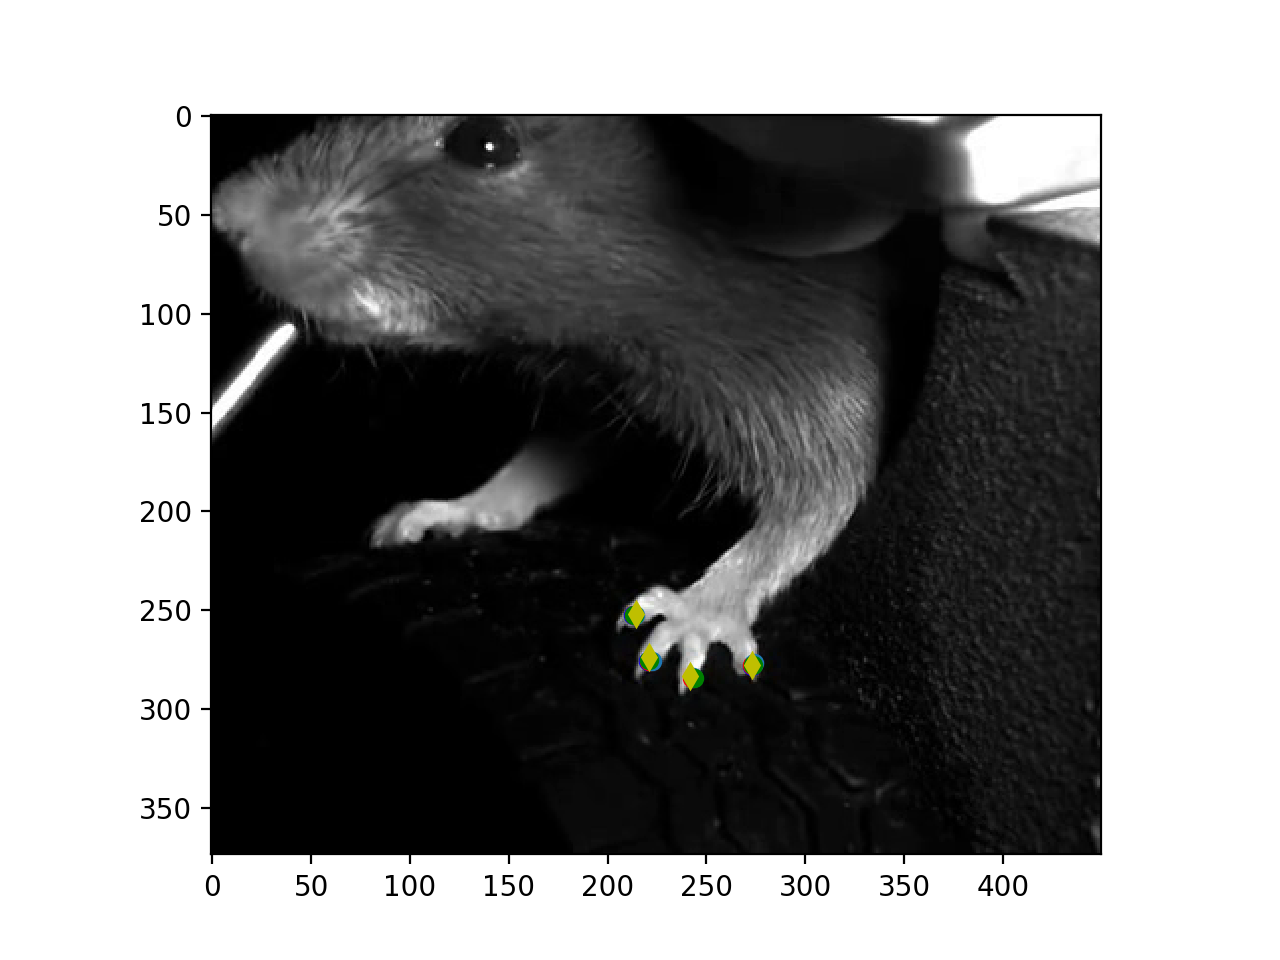



                                                        
                                                           

t:  84%|████████▎ | 669/800 [02:10<00:12, 10.71it/s, now=None]

                                                        
                                                           

t:   1%|          | 2/200 [00:00<00:12, 16.11it/s, now=None]e]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:  71%|███████   | 142/200 [00:12<00:05, 11.04it/s, now=None]
                                                              

                                                        

t:  84%|████████▍ | 335/400 [01:05<00:07,  8.70it/s, now=None]

                                                        

t:  84%|████████▍ | 335/400 [01:05<00:07,  8.70it/s, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [38]:
markers = ["bo","ro","o","go"]
fig,ax = plt.subplots()
plt.axis("off")
def make_frame(isec):
    i = int(isec*clip.fps)
    ax.clear()
    frame = clip.get_frame(i/clip.fps)
    plt.imshow(frame)
    for j in range(4):
        runpose = all_pose[f"run{j}"]
        framerunpose = runpose[i]
        plt.plot(*framerunpose,markers[j])
    framemedpose = medpose_full[i] 
    plt.plot(*framemedpose,"yd")
    return (mplfig_to_npimage(fig))
animation = VideoClip(make_frame,duration = 40)
animation.ipython_display(fps=5,loop=True,autopla=True)

In [40]:
animation.write_videofile("ctn_examplevid_draft.mp4",fps = 5)



                                                        

t:  84%|████████▍ | 335/400 [05:57<00:07,  8.70it/s, now=None]

                                                        

t:   0%|          | 0/200 [00:00<?, ?it/s, now=None] now=None]

Moviepy - Building video ctn_examplevid_draft.mp4.
Moviepy - Writing video ctn_examplevid_draft.mp4



t:  16%|█▌        | 31/200 [00:04<00:24,  6.99it/s, now=None]



Moviepy - Done !
Moviepy - video ready ctn_examplevid_draft.mp4
